## What is the true normal human body temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. In 1992, this value was revised to 36.8$^{\circ}$C or 98.2$^{\circ}$F. 

#### Exercise
In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.

Answer the following questions **in this notebook below and submit to your Github account**. 

1.  Is the distribution of body temperatures normal? 
    - Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply. 
2.  Is the true population mean really 98.6 degrees F?
    - Bring out the one sample hypothesis test! In this situation, is it approriate to apply a z-test or a t-test? How will the result be different?
3.  At what temperature should we consider someone's temperature to be "abnormal"?
    - Start by computing the margin of error and confidence interval.
4.  Is there a significant difference between males and females in normal temperature?
    - Set up and solve for a two sample hypothesis testing.

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [2]:
%matplotlib inline
from __future__ import division
import scipy.stats as st
import pandas as pd
import numpy as np
import math

In [3]:
df = pd.read_csv('data/human_body_temperature.csv')

 % of data outside the 95% CI on one side  is 2.30769230769%
 % of data outside the 95% CI on the other side is 3.07692307692%


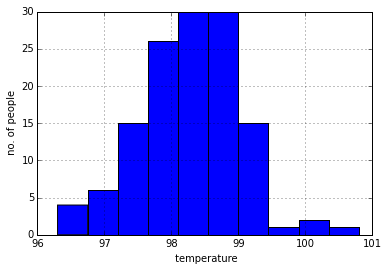

In [4]:
plot = df['temperature'].hist()
plot.set_xlabel(" temperature")
plot.set_ylabel(" no. of people ")

mean = sum (df['temperature'])/ len(df)
std_dev = np.std(df['temperature'])

temp1 = df[ df.temperature > (mean + 2 * std_dev)]
temp2 = df[ df.temperature < (mean - 2 * std_dev)]

per_temp1_out_95CI = len(temp1)/ len(df) *100
per_temp2_out_95CI = len(temp2)/ len(df) *100

print (" % of data outside the 95% CI on one side  is " + str (per_temp1_out_95CI)+ "%")
print (" % of data outside the 95% CI on the other side is " + str (per_temp2_out_95CI) + "%")

# Thus both the graphical analysis and the  numerical analysis indicate that the distribution 
# is approximately a normal distribution 

In [5]:
# Assume the null hypthesis to be 98.6 degree F. Since the sample size > 30, hence z-test may be applied. 
std_err = std_dev/ math.sqrt(len(df))
zscore = (98.6 - 98.2)/std_err
pvalue = st.norm.cdf(zscore)
print (" p - value of the hypothesis is " + str( pvalue * 100)+ "%")

# Since the p- value is greater than 5%, hence the null hypothesis can not be rejected.  

 p - value of the hypothesis is 99.9999999787%


In [6]:
upper_limit_CI = 98.2 + 1.96 * std_err
lower_limit_CI = 98.2 - 1.96 * std_err
print (" temeperature is abnormal if it is less than " + str (lower_limit_CI)
      + " or is greater than " + str(upper_limit_CI))

 temeperature is abnormal if it is less than 98.0744490352 or is greater than 98.3255509648


In [15]:
# Hypothesis is mean(male_df) - mean(female_df) is zero
male_df = df[df.gender == "M"]
female_df = df [df.gender == "F"]

male_df = male_df['temperature']
female_df = female_df['temperature']

print (np.mean(male_df))
print (np.mean(female_df))

std_error_male = np.std(male_df)/ math.sqrt(len(male_df))
std_error_female = np.std(female_df)/ math.sqrt(len(female_df))

std_error = math.sqrt(std_error_male * std_error_male + std_error_female * std_error_female)
zscore = ( np.mean(male_df) - np.mean(female_df) )/ std_error
pvalue = st.norm.cdf(zscore)

print (" pvalue for the sample is " + str(pvalue))

# Since the pvalue is less than 5 percent hence the hypothesis is rejected
# and thus claims that male and females have different body temperatures. 

98.1046153846
98.3938461538
 pvalue for the sample is 0.0106332259151
